# MLPRegressor

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import r2_score, mean_absolute_percentage_error, mean_absolute_error, mean_squared_error
from statsmodels.tools.eval_measures import stde


## Read the etl info results

In [2]:
df_info = pd.read_csv('../../dataset_clean/options_csv_v1_etl.csv')
df_info

,remove_time_features,generic_features,remove_atypical_values,feature_combination,remove_feature_selection,remove_invalid_correlated_features
0,False,False,False,False,False,False


## Read the dataset

In [3]:
df = pd.read_csv('../../dataset_clean/PlatteRiverWeir_features_v1_clean.csv')
df

,SensorTime,CaptureTime,Stage,Discharge,grayMean,graySigma,entropyMean,entropySigma,hMean,hSigma,...,WeirPt2X,WeirPt2Y,WwRawLineMin,WwRawLineMax,WwRawLineMean,WwRawLineSigma,WwCurveLineMin,WwCurveLineMax,WwCurveLineMean,WwCurveLineSigma
0,2012-06-09 13:15:00,2012-06-09T13:09:07,2.99,916.0,97.405096,39.623303,0.203417,0.979825,105.368375,41.572939,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,2012-06-09 13:15:00,2012-06-09T13:10:29,2.99,916.0,104.066757,40.179745,0.206835,1.002624,112.399458,41.795584,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,2012-06-09 13:45:00,2012-06-09T13:44:01,2.96,873.0,105.636831,40.533218,0.204756,0.994246,114.021526,42.145582,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,2012-06-09 14:45:00,2012-06-09T14:44:30,2.94,846.0,104.418949,41.752678,0.202428,0.983170,112.612830,43.575351,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,2012-06-09 15:45:00,2012-06-09T15:44:59,2.94,846.0,106.763541,44.442097,0.202661,0.989625,114.839424,46.302008,...,-1,-1,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42054,2019-10-11 09:00:00,2019-10-11T08:59:53,2.54,434.0,82.872720,57.702652,0.221708,1.076393,87.260572,61.485334,...,2446,1900,9284.0,77521.0,38385.370066,15952.029728,0.0,70085.0,37550.894823,16444.401209
42055,2019-10-11 10:00:00,2019-10-11T09:59:52,2.54,434.0,89.028383,55.840861,0.233168,1.124774,94.175906,59.006132,...,2440,1900,10092.0,74614.0,40162.989292,15467.708856,0.0,70061.0,39397.339095,16009.008049
42056,2019-10-11 11:00:00,2019-10-11T10:59:52,2.54,434.0,94.722097,54.355753,0.240722,1.151833,100.534577,56.921028,...,2447,1900,7067.0,83260.0,42095.946590,16770.357949,0.0,76335.0,41350.006568,17489.374617
42057,2019-10-11 12:00:00,2019-10-11T11:59:53,2.54,434.0,96.693270,52.787629,0.244789,1.171987,102.891159,55.083532,...,2443,1900,6283.0,83045.0,45345.490954,17498.432849,0.0,78882.0,44553.920296,18268.294896


In [4]:
df['SensorTime'] = pd.to_datetime(df['SensorTime'])
df['Year'] = df['SensorTime'].dt.year

In [5]:
df.dtypes

SensorTime          datetime64[ns]
CaptureTime                 object
Stage                      float64
Discharge                  float64
grayMean                   float64
graySigma                  float64
entropyMean                float64
entropySigma               float64
hMean                      float64
hSigma                     float64
sMean                      float64
sSigma                     float64
vMean                      float64
vSigma                     float64
areaFeatCount                int64
grayMean0                  float64
graySigma0                 float64
entropyMean0               float64
entropySigma0              float64
hMean0                     float64
hSigma0                    float64
sMean0                     float64
sSigma0                    float64
vMean0                     float64
vSigma0                    float64
grayMean1                  float64
graySigma1                 float64
entropyMean1               float64
entropySigma1       

In [6]:
df = df[(df.Stage > 0) & (df.Discharge > 0)]

## Divide dataset to X and Y

In [7]:
np.random.seed(0)

df_train = df[(df.Year >= 2012) & (df.Year <= 2017)]
df_train = df_train.iloc[np.random.permutation(len(df_train))]

df_test = df[(df.Year >= 2018) & (df.Year <= 2019)]

In [8]:
df_train = df_train.drop(columns=["Year", "SensorTime", "CaptureTime"])
df_test = df_test.drop(columns=["Year", "SensorTime", "CaptureTime"])

In [9]:
y_train = df_train["Stage"]
X_train = df_train.drop(columns=["Stage", "Discharge"])

y_test = df_test["Stage"]
X_test = df_test.drop(columns=["Stage", "Discharge"])

In [10]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

## Train model

In [11]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('clf', MLPRegressor(shuffle=False, max_iter=2000))
])

#param_grid = {'clf__hidden_layer_sizes': [(10), (10, 20), (10, 5, 15), (20, 30, 10, 15)], 'clf__alpha': np.arange(1e-3, 1, 0.001), 'clf__learning_rate_init': np.arange(1e-3, 0.1, 0.001), 'clf__activation': ['tanh', 'relu']}

param_grid = {'clf__hidden_layer_sizes': [(256, 256, 128, 128, 64), (512, 256), (128, 64, 64, 32), (512, 256, 128, 128)], 'clf__alpha': np.arange(1e-3, 0.1, 0.001), 'clf__activation': ['tanh', 'relu']}

clf = RandomizedSearchCV(pipeline, param_distributions=param_grid, n_iter=10, n_jobs=8, verbose=3, scoring="neg_mean_squared_error")

In [12]:
clf.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 2/5] END clf__activation=tanh, clf__alpha=0.095, clf__hidden_layer_sizes=(128, 64, 64, 32);, score=-0.061 total time=  34.8s
[CV 1/5] END clf__activation=tanh, clf__alpha=0.095, clf__hidden_layer_sizes=(128, 64, 64, 32);, score=-0.061 total time=  38.9s
[CV 3/5] END clf__activation=tanh, clf__alpha=0.095, clf__hidden_layer_sizes=(128, 64, 64, 32);, score=-0.064 total time=  39.8s
[CV 4/5] END clf__activation=tanh, clf__alpha=0.095, clf__hidden_layer_sizes=(128, 64, 64, 32);, score=-0.064 total time=  37.9s
[CV 5/5] END clf__activation=tanh, clf__alpha=0.095, clf__hidden_layer_sizes=(128, 64, 64, 32);, score=-0.055 total time=  40.7s
[CV 3/5] END clf__activation=tanh, clf__alpha=0.019000000000000003, clf__hidden_layer_sizes=(256, 256, 128, 128, 64);, score=-0.057 total time= 1.8min
[CV 4/5] END clf__activation=tanh, clf__alpha=0.019000000000000003, clf__hidden_layer_sizes=(256, 256, 128, 128, 64);, score=-0.061 total time=

RandomizedSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                             ('clf',
                                              MLPRegressor(max_iter=2000,
                                                           shuffle=False))]),
                   n_jobs=8,
                   param_distributions={'clf__activation': ['tanh', 'relu'],
                                        'clf__alpha': array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024...
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
                                        'clf__hidden_layer_sizes': [(256, 256,
                                                                     128, 128,
                                                                     64),
                                                                    (512, 256),
                                                                    (128, 64,
                                                                     64, 32),
                                                                    (512, 256,
                                                                     128,
                                                                     128)]},
                   scoring='neg_mean_squared_error', verbose=3)

In [13]:
clf.best_score_

-0.04943315584632803

In [14]:
clf.best_params_

{'clf__hidden_layer_sizes': (512, 256, 128, 128),
 'clf__alpha': 0.098,
 'clf__activation': 'relu'}

## Test model

In [15]:
clf.score(X_test, y_test)


-0.1206052057848756

In [16]:
y_pred = clf.predict(X_test)

In [17]:
print("R^2: ", r2_score(y_test, y_pred))
print("mse: ", mean_squared_error(y_test, y_pred))
print("rmse: ", mean_squared_error(y_test, y_pred, squared=False))
print("mae: ", mean_absolute_error(y_test, y_pred))
print("mape: ", mean_absolute_percentage_error(y_test, y_pred))
print("Error estandar: ", stde(y_test.squeeze(),
      y_pred.squeeze(), ddof=2))


R^2:  0.6911826502732412
mse:  0.1206052057848756
rmse:  0.3472826021914654
mae:  0.2223266992186864
mape:  0.07807590869777666
Error estandar:  0.3354015354813988


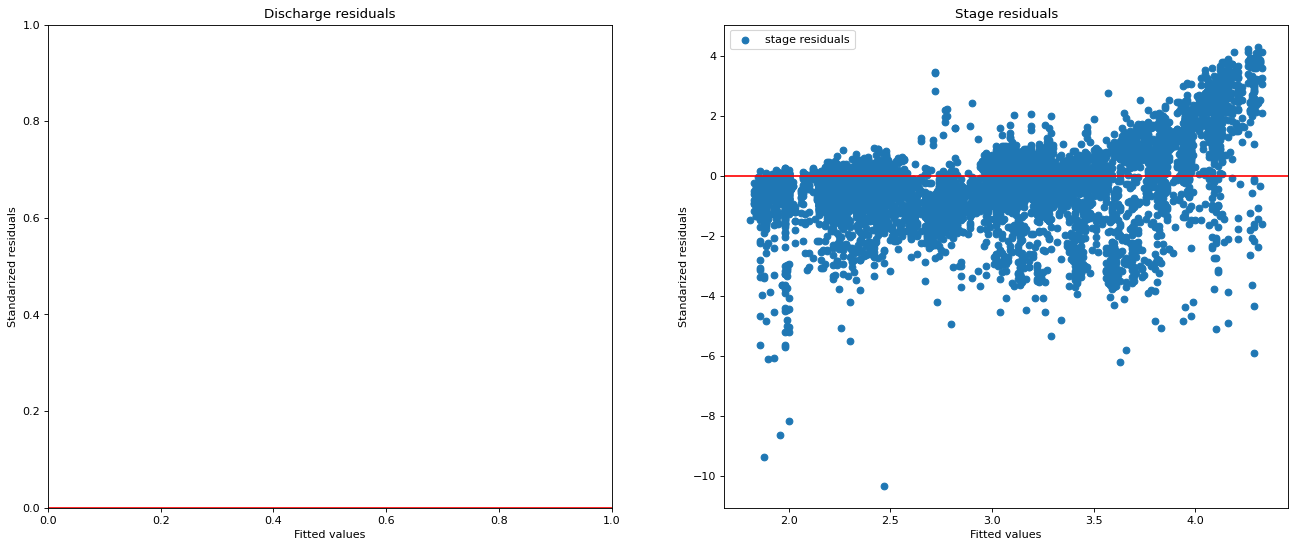

In [18]:
residuals = y_test - y_pred
residuals_std = residuals/residuals.std()

y_real_stage = y_test
residual_stage = residuals

#y_real_discharge = np.array([i[-1] for i in y_test])
#residual_discharge = np.array([i[-1] for i in residuals])


figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[1].scatter(y_real_stage, residual_stage / residual_stage.std(), label="stage residuals")
#ax[0].scatter(y_real_discharge, residual_discharge / residual_discharge.std(), label="discharge residuals")
ax[1].axhline(y=0.0, color='r', linestyle='-')
ax[0].axhline(y=0.0, color='r', linestyle='-')

ax[1].set_title("Stage residuals")
ax[0].set_title("Discharge residuals")

ax[1].set_xlabel("Fitted values")
ax[0].set_xlabel("Fitted values")
ax[1].set_ylabel("Standarized residuals")
ax[0].set_ylabel("Standarized residuals")

plt.legend()
plt.show()

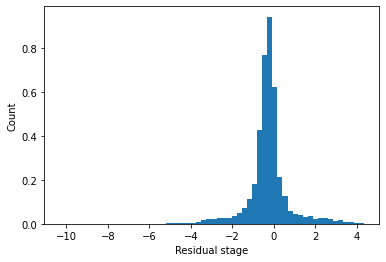

In [19]:
plt.hist(residual_stage / residual_stage.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual stage');
plt.show()

In [20]:
"""plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)
plt.ylabel('Count')
plt.xlabel('Residual discharge');
plt.show()"""

"plt.hist(residual_discharge / residual_discharge.std(), density=True, bins = 60)\nplt.ylabel('Count')\nplt.xlabel('Residual discharge');\nplt.show()"

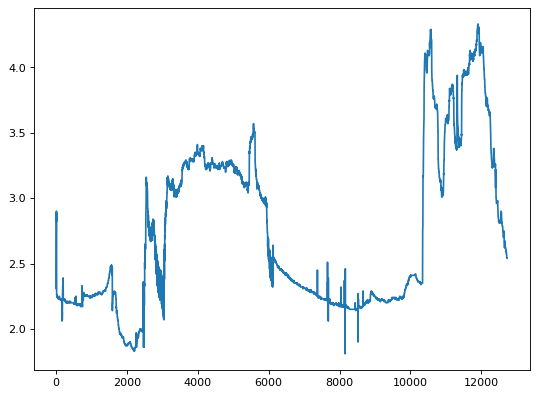

In [21]:
plt.figure(figsize=(8, 6), dpi=80)
plt.plot(np.arange(len(y_test)), y_test, label="Stage real")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


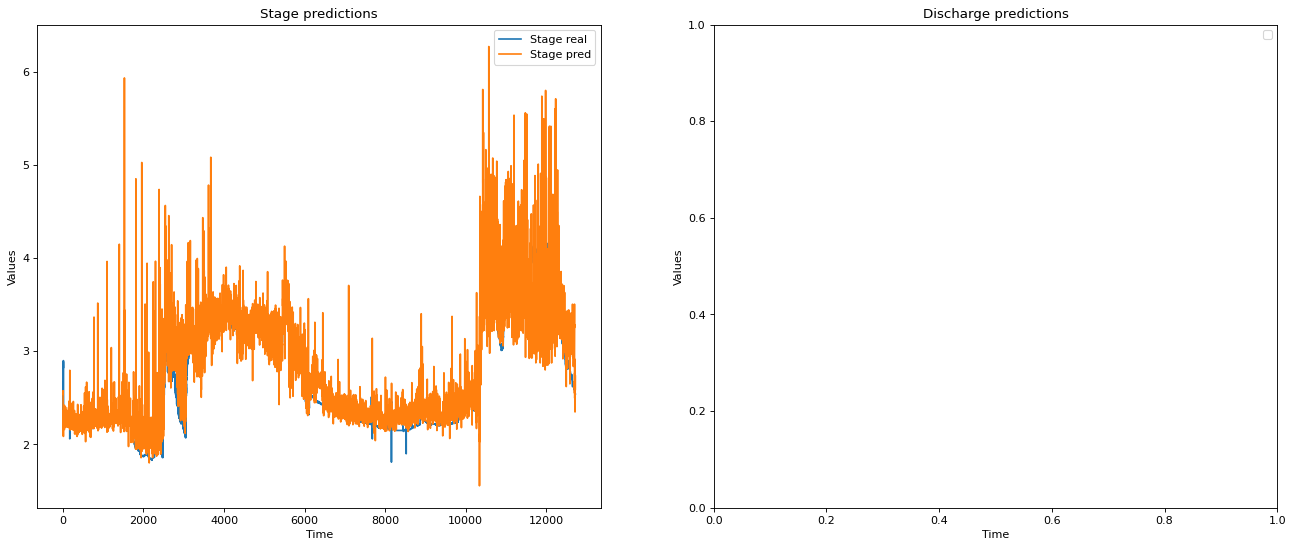

In [22]:
figure, ax = plt.subplots(ncols=2, figsize=(20, 8), dpi=80)

ax[0].plot(np.arange(len(y_test)), y_test, label="Stage real")
ax[0].plot(np.arange(len(y_test)), y_pred, label="Stage pred")

ax[0].set_title("Stage predictions")
ax[1].set_title("Discharge predictions")

ax[1].set_ylabel("Values")
ax[0].set_ylabel("Values")
ax[1].set_xlabel("Time")
ax[0].set_xlabel("Time")

ax[0].legend()
ax[1].legend()
plt.show()